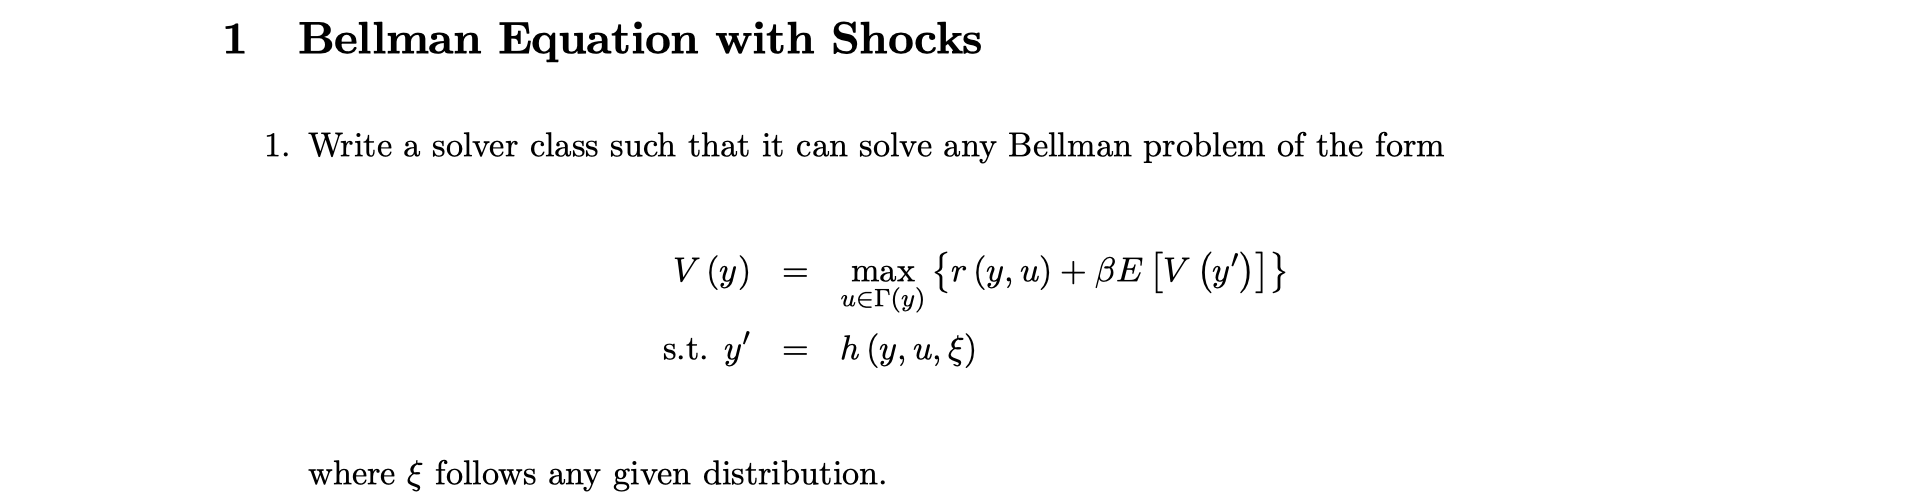

In [ ]:
def value_func_iterate(y_grid, v0_grid):
    res = np_array(
        Parallel(n_jobs=n_jobs, verbose=0, return_as='list', batch_size=grid_size // n_jobs)
            (delayed(fminbound)
            (func=lambda u, y=y: -(r(y, u) + beta * interp(h(y, u, zeta_sample), y_grid, v0_grid).mean(axis=0)), x1=0, x2=T(y), full_output=True) 
            for y in y_grid))
    u_grid, v_grid_updated = res[:,0], -res[:,1]
    return u_grid, v_grid_updated

this is used in question 2.

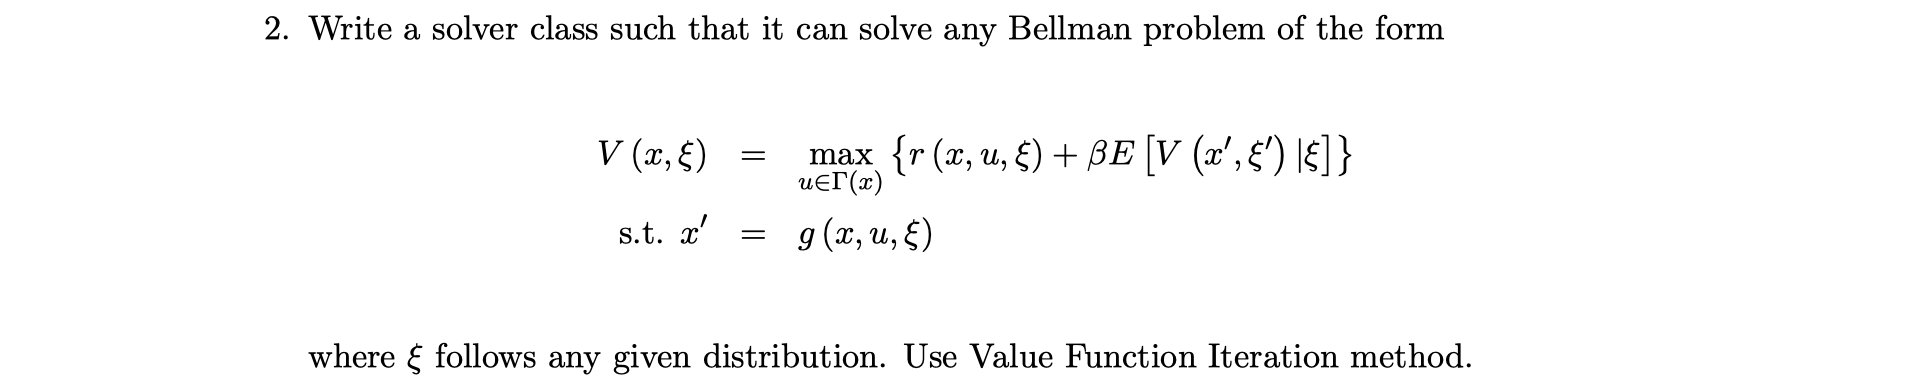

In [ ]:
def value_func_iterate(x_grid, zeta_grid, v0_grid):
    res = np_array(
        Parallel(n_jobs=n_jobs, verbose=0, return_as='list', batch_size=grid_size // n_jobs)
            (delayed(fminbound)
            (func=lambda u, x=x, zeta=zeta: -(r(x, u, zeta) + beta * np_array(interp2(x_grid, zeta_grid, v0_grid)(g(x, u, zeta), zeta_prime_grid(zeta))).mean()), x1=0, x2=T(x,zeta), full_output=True) 
            for zeta in zeta_grid for x in x_grid))
    u_grid, v_grid_updated = np_array(res[:,0]), -np_array(res[:,1])
    u_grid = u_grid.reshape(-1, grid_size)
    v_grid_updated = v_grid_updated.reshape(-1, grid_size)
    return u_grid, v_grid_updated

this is used in question 3.